## SQL Project Planning
```
You are given a table, Projects, containing three columns: Task_ID, Start_Date and End_Date. It is guaranteed that the difference between the End_Date and the Start_Date is equal to 1 day for each row in the table.
```
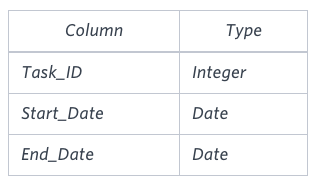
```
If the End_Date of the tasks are consecutive, then they are part of the same project. Samantha is interested in finding the total number of different projects completed.

Write a query to output the start and end dates of projects listed by the number of days it took to complete the project in ascending order. If there is more than one project that have the same number of completion days, then order by the start date of the project.

#### Sample Input
```
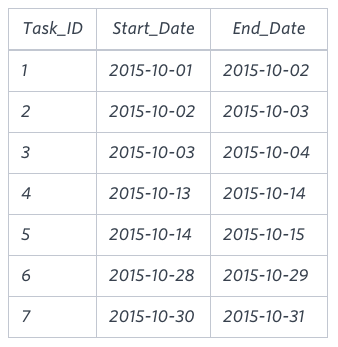
```
#### Sample Output

2015-10-28 2015-10-29
2015-10-30 2015-10-31
2015-10-13 2015-10-15
2015-10-01 2015-10-04

#### Explanation

The example describes following four projects:

Project 1: Tasks 1, 2 and 3 are completed on consecutive days, so these are part of the project. Thus start date of project is 2015-10-01 and end date is 2015-10-04, so it took 3 days to complete the project.

Project 2: Tasks 4 and 5 are completed on consecutive days, so these are part of the project. Thus, the start date of project is 2015-10-13 and end date is 2015-10-15, so it took 2 days to complete the project.

Project 3: Only task 6 is part of the project. Thus, the start date of project is 2015-10-28 and end date is 2015-10-29, so it took 1 day to complete the project.

Project 4: Only task 7 is part of the project. Thus, the start date of project is 2015-10-30 and end date is 2015-10-31, so it took 1 day to complete the project.
```

```
/*
Enter your query here.
*/
SELECT MIN(start_date), MAX(end_date)
FROM (
    SELECT 
        start_date, end_date, 
        SUM(flag) OVER(ORDER BY start_date) AS grp
    FROM (
        SELECT 
            task_id, start_date, end_date,
            CASE WHEN LAG(end_date) OVER(ORDER BY start_date) = start_date 
                 THEN 0 ELSE 1 END AS flag
        FROM Projects) t1
  ) t2
GROUP BY grp
ORDER BY DATEDIFF(MAX(end_date), MIN(start_date)), MIN(start_date);
```